# California House Price Predictions

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.offline as py
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from NeuralNetworks.code.layers.fullyconnected import FC
from NeuralNetworks.code.activations.activations import get_activation
from NeuralNetworks.code.losses.meansquarederror import MeanSquaredError
from NeuralNetworks.code.models.model import Model
from NeuralNetworks.code.optimizers.adam import Adam
from sklearn.model_selection import StratifiedShuffleSplit
print('Libs imported successfully')

Libs imported successfully


## Loading Dataset

Step 1: Load the dataset

In [2]:
data = pd.read_csv('california_houses_price/california_housing_train.csv')

Step 2: Explore the dataset

In [3]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
0    -114.31     34.19                15.0       5612.0          1283.0  \
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  


Number of samples:

In [4]:
data.shape[0]

17000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [7]:
#describe will show the summary of numerical data

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

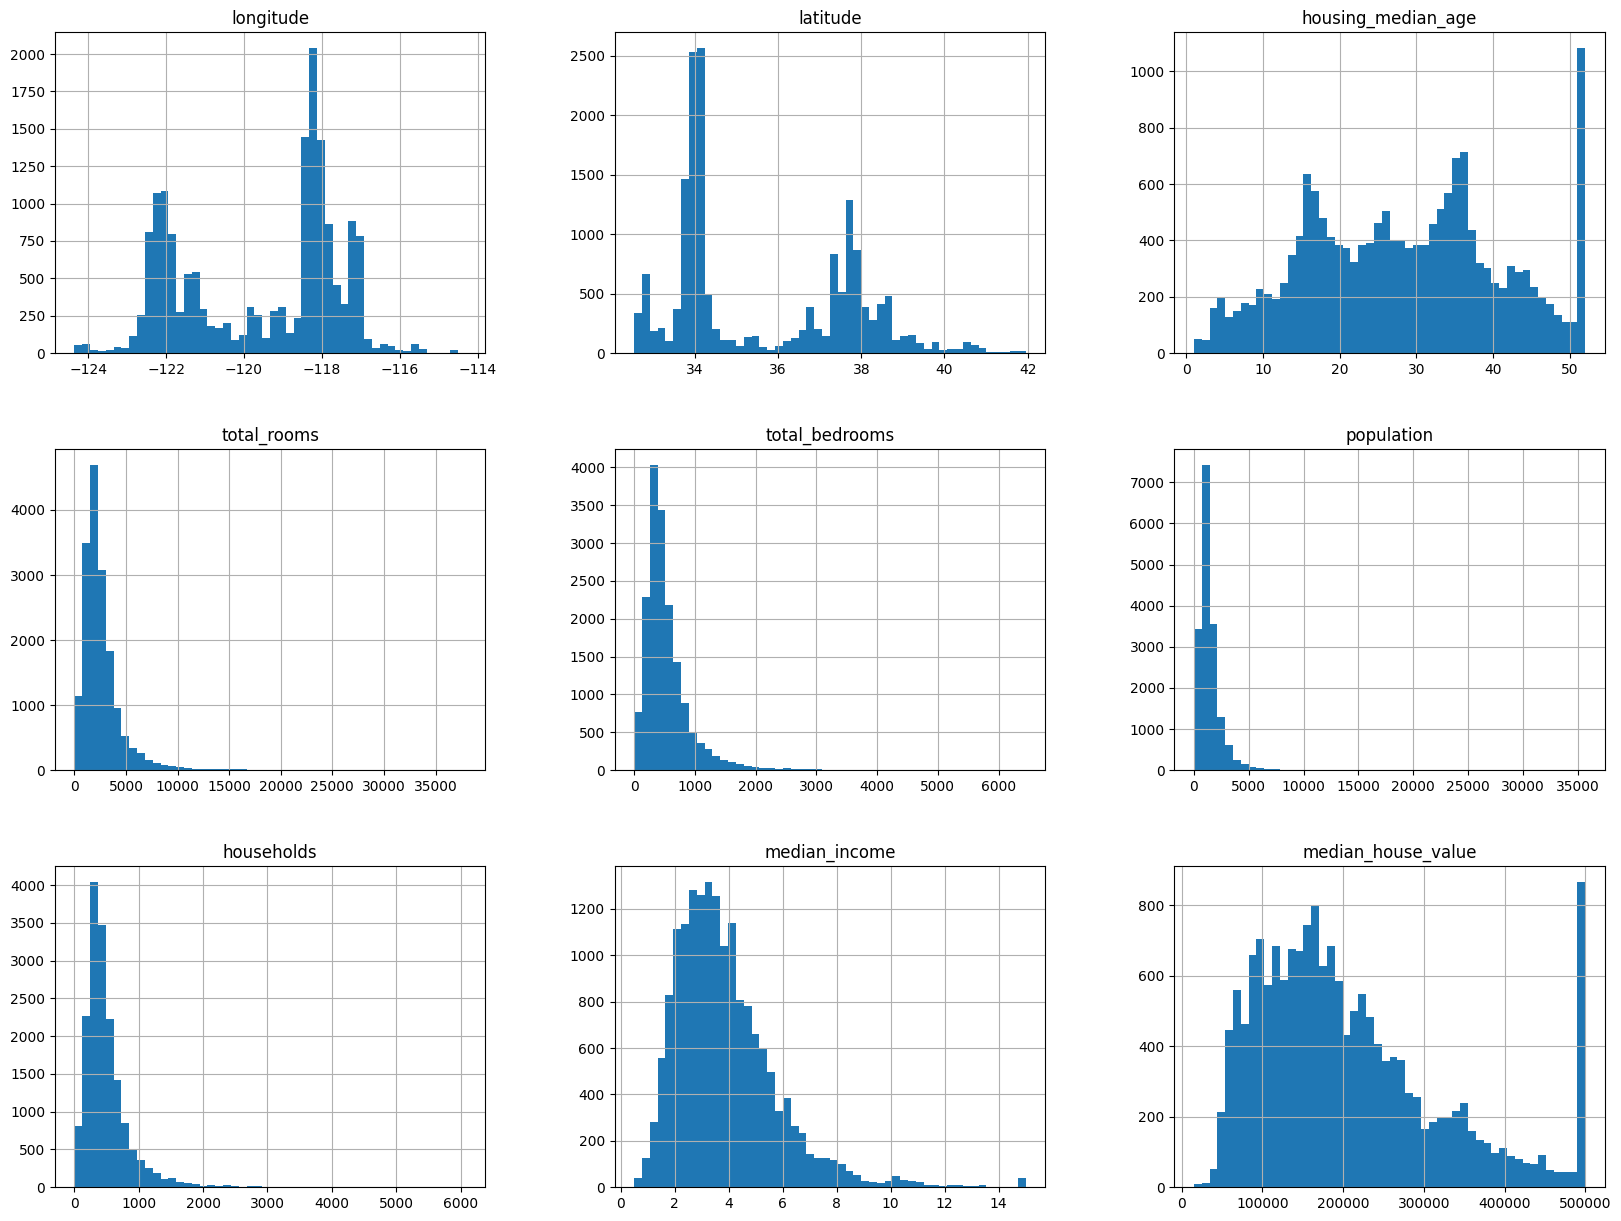

In [8]:
#lets plot a histogram for no. of instances

data.hist(bins=50,figsize=(20,15))

### Creating test

select the feature we will use

In [9]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [10]:
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

Normalize the features

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the data in train and test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Define the architecture

In [13]:
X_train.shape[1]

8

In [14]:
arch = {
    'FC1': FC(input_size=X_train.shape[1], output_size=128, name='FC1'),
    'activation1': get_activation('relu'),
    'FC2': FC(input_size=128, output_size=64, name='FC2'),
    'activation2': get_activation('relu'),
    'FC3': FC(input_size=64, output_size=32, name='FC3'),
    'activation3': get_activation('relu'),
    'FC4': FC(input_size=32, output_size=1, name='FC4'),
    'activation4': get_activation('linear'),  # Add linear activation for the final layer
}

Create the criterion (loss) function

In [15]:
criterion = MeanSquaredError()

Create the optimizer

In [25]:
optimizer = Adam(arch, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8)

Create the model instance

In [17]:
model = Model(arch, criterion, optimizer)

### Train the model with validation

In [18]:
epochs = 10  # Set the number of epochs
batch_size = 3  # Set the batch size

### Create a validation set
A validation set is used to evaluate the performance of a machine learning model during training. It provides an unbiased estimate of the model's performance on unseen data. By monitoring the performance on the validation set, you can make decisions about adjusting hyperparameters, modifying the model architecture, or stopping the training process to avoid overfitting.

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
train_loss, val_loss = model.train(X_train, y_train, epochs, val=(X_val, y_val), batch_size=batch_size, shuffling=True, verbose=1)

#################################################3


 40%|████      | 4/10 [00:00<00:00, 30.77it/s]

EPOCH = 1 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Batch is [3, 5, 6]
fine2
Forward Step:
Forward Step:
Forward Step:
Forward Step:
AL ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[[0.59669617]
 [0.34364626]
 [1.07796341]]
Y ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
[307400.0, 187500.0, 111400.0]
COST $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
71030117057.6157
Backward Step:
Backward Step:
Backward Step:
Backward Step:
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FC1
PARAMETERS
before
W
[[-0.44702587 -0.10288346 -0.07853708 ...  0.25243728 -0.54272028
  -0.43992373]
 [ 0.30601621  0.54090134 -0.6164594  ... -0.09178381  0.25559788
  -0.61442117]
 [ 0.10718033  0.59510518 -0.13839824 ...  0.75607082 -0.7128428
  -0.15451209]
 ...
 [-0.51380787  0.00749554  0.07784343 ... -1.78803

100%|██████████| 10/10 [00:00<00:00, 32.26it/s]

[[-0.43558614 -0.11409621 -0.08532664 ...  0.25180652 -0.54084742
  -0.42786055]
 [ 0.31679938  0.5300745  -0.6261193  ... -0.08233861  0.26500145
  -0.60403424]
 [ 0.11467606  0.58821717 -0.13723313 ...  0.74915981 -0.71982311
  -0.14202864]
 ...
 [-0.52330726  0.01701985  0.06825253 ... -1.77831229  0.63220061
   0.33469902]
 [-0.12270976  0.25604649 -0.25165559 ... -0.27080892  0.52503403
  -0.21838562]
 [-0.61915548  0.93469596 -0.28101949 ... -0.1872491  -0.1783301
  -0.28159463]]
b
[[-0.01382348]
 [-0.01078623]
 [-0.0124196 ]
 [-0.00948984]
 [-0.00892514]
 [ 0.        ]
 [-0.00994647]
 [-0.00741427]
 [-0.00974604]
 [-0.0096956 ]
 [ 0.        ]
 [-0.00662328]
 [-0.01066033]
 [-0.00862068]
 [-0.01005112]
 [-0.00840241]
 [-0.00888347]
 [-0.00932404]
 [-0.00955031]
 [-0.00804131]
 [-0.00811868]
 [-0.00727237]
 [-0.00793924]
 [-0.00722322]
 [-0.00696859]
 [-0.00982193]
 [-0.00690129]
 [-0.00907384]
 [-0.01002129]
 [-0.00749452]
 [-0.00680093]
 [-0.00767662]
 [-0.00939887]
 [-0.0067691

Perform predictions on the test set

In [20]:
y_pred = model.predict(X_test)

Forward Step:
Forward Step:
Forward Step:
Forward Step:


Evaluate the model

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)

Mean Squared Error: 57741644359.260994


Visualize the predictions

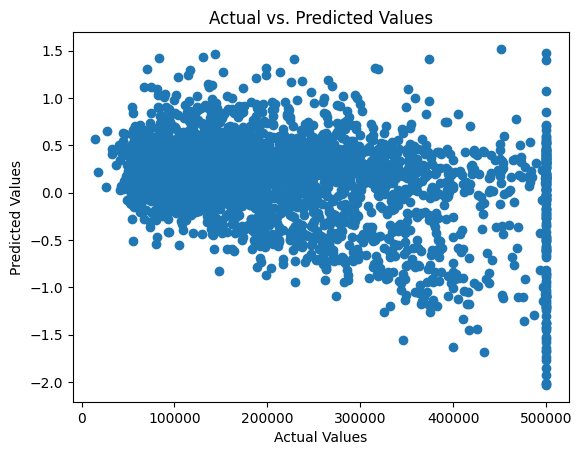

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()